In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
pd.set_option("max_colwidth", None)
pd.set_option("display.max_columns", None)

In [3]:
data_dictionary = pd.read_csv('data_dictionary.csv')

data_dictionary

,Field,Description
0,VendorID,"A code indicating the LPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= Verifone Inc.)"
1,lpep_pickup_datetime,The date and time when the meter was engaged
2,lpep_dropoff_datetime,The date and time when the meter was disengaged
3,store_and_fwd_flag,"This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka �store and forward,� because the vehicle did not have a connection to the server (Y= store and forward trip; N= not a store and forward trip)"
4,RatecodeID,The final rate code in effect at the end of the trip (1= Standard rate; 2= JFK; 3= Newark; 4= Nassau or Westchester; 5= Negotiated fare; 6= Group ride)
5,PULocationID,TLC Taxi Zone in which the taximeter was engaged
6,DOLocationID,TLC Taxi Zone in which the taximeter was disengaged
7,passenger_count,The number of passengers in the vehicle (this is a driver entered value)
8,trip_distance,The elapsed trip distance in miles reported by the taximeter
9,fare_amount,The time-and-distance fare calculated by the meter


In [4]:
taxi_zones = pd.read_csv('taxi_zones.csv')

taxi_zones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [5]:
calendar = pd.read_csv('454_calendar.csv')

calendar

,Date,FiscalYear,FiscalQuarter,FiscalMonthNumber,FiscalMonthOfQuarter,FiscalWeekOfYear,DayOfWeek,FiscalMonthName,FiscalMonthYear,FiscalQuarterYear,DayOfMonthNumber,DayName
0,2017-02-05,2017,1,1,1,1,0,February,17-Feb,12017,5,Sunday
1,2017-02-06,2017,1,1,1,1,1,February,17-Feb,12017,6,Monday
2,2017-02-07,2017,1,1,1,1,2,February,17-Feb,12017,7,Tuesday
3,2017-02-08,2017,1,1,1,1,3,February,17-Feb,12017,8,Wednesday
4,2017-02-09,2017,1,1,1,1,4,February,17-Feb,12017,9,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2021-01-26,2020,4,12,3,52,2,January,20-Jan,42020,26,Tuesday
1452,2021-01-27,2020,4,12,3,52,3,January,20-Jan,42020,27,Wednesday
1453,2021-01-28,2020,4,12,3,52,4,January,20-Jan,42020,28,Thursday
1454,2021-01-29,2020,4,12,3,52,5,January,20-Jan,42020,29,Friday


In [6]:
taxi_trips_2017 = pd.read_csv('taxi_trips/2017_taxi_trips.csv')
taxi_trips_2018 = pd.read_csv('taxi_trips/2018_taxi_trips.csv')
taxi_trips_2019 = pd.read_csv('taxi_trips/2019_taxi_trips.csv')
taxi_trips_2020 = pd.read_csv('taxi_trips/2020_taxi_trips.csv')

print(taxi_trips_2017.shape)
print(taxi_trips_2018.shape)
print(taxi_trips_2019.shape)
print(taxi_trips_2020.shape)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(11740667, 18)
(8807303, 18)
(6044050, 19)
(1734051, 19)


In [7]:
taxi_trips_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.6+ GB


In [8]:
taxi_trips_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807303 entries, 0 to 8807302
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.2+ GB


In [9]:
taxi_trips_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044050 entries, 0 to 6044049
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 876.1+ MB


In [10]:
taxi_trips_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734051 entries, 0 to 1734050
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 251.4+ MB


In [11]:
taxi_trips_2019['congestion_surcharge'].value_counts()

 0.00    4346092
 2.75     732668
 2.50       4651
 0.75         73
-2.75         72
 2.00          2
-2.50          1
-0.75          1
 0.30          1
Name: congestion_surcharge, dtype: int64

In [12]:
taxi_trips_2020['congestion_surcharge'].value_counts()

 0.00    993526
 2.75    211706
 2.50       709
-2.75        11
 0.75         7
Name: congestion_surcharge, dtype: int64

In [13]:
# congestion_surcharge is missing from taxi_trips_2017 and taxi_trips_2018. Adding the column to make all dataframes same width before concatenating the dataframes
taxi_trips_2017['congestion_surcharge'] = 0.0
taxi_trips_2018['congestion_surcharge'] = 0.0

print(taxi_trips_2017.shape)
print(taxi_trips_2018.shape)

(11740667, 19)
(8807303, 19)


In [14]:
# Concating all taxi trips
taxi_trips = pd.concat([taxi_trips_2017, taxi_trips_2018, taxi_trips_2019, taxi_trips_2020]).reset_index(drop = True)

taxi_trips.shape

(28326071, 19)

In [15]:
# Verifying the number of rows
print("Total rows in concatenated dataframe: {}".format(taxi_trips.shape[0]))
print("Rows in each dataframe added up: {}".format(taxi_trips_2017.shape[0] + taxi_trips_2018.shape[0] + taxi_trips_2019.shape[0] + taxi_trips_2020.shape[0]))

Total rows in concatenated dataframe: 28326071
Rows in each dataframe added up: 28326071


In [16]:
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28326071 entries, 0 to 28326070
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 4.0+ GB


## Data Types

<div class="alert alert-block alert-info">
    <h4>Data Types Inferred from Data Dictionary</h4><br>
    <b>VendorID:</b> Integer<br>
    <b>lpep_pickup_datetime:</b> DateTime - Done<br>
    <b>lpep_dropoff_datetime:</b> DateTime - Done<br>
    <b>store_and_fwd_flag:</b> String - Correct<br>
    <b>RatecodeID:</b> Integer<br>
    <b>PULocationID:</b> Integer - Correct<br>
    <b>DOLocationID:</b> Integer - Correct<br>
    <b>passenger_count:</b> Integer<br>
    <b>trip_distance:</b> Float - Correct<br>
    <b>fare_amount:</b> Float - Correct<br>
    <b>extra:</b> Float - Correct<br>
    <b>mta_tax:</b> Float - Correct<br>
    <b>tip_amount:</b> Float - Correct<br>
    <b>tolls_amount:</b> Float - Correct<br>
    <b>improvement_surcharge:</b> Float - Correct<br>
    <b>total_amount:</b> Float - Correct<br>
    <b>payment_type:</b> Integer<br>
    <b>trip_type:</b> Integer<br>
    <b>congestion_surcharge:</b> Float - Correct<br>
</div>

##### Converting String to DateTime format

In [17]:
taxi_trips['lpep_pickup_datetime'] = pd.to_datetime(taxi_trips['lpep_pickup_datetime'])
taxi_trips['lpep_dropoff_datetime'] = pd.to_datetime(taxi_trips['lpep_dropoff_datetime'])

print(taxi_trips['lpep_pickup_datetime'].dtype)
print(taxi_trips['lpep_dropoff_datetime'].dtype)

datetime64[ns]
datetime64[ns]


<div class="alert alert-block alert-info">
    <h4>Data Types Inferred from Data Dictionary</h4><br>
    <b>VendorID:</b> Integer<br>
    <b>RatecodeID:</b> Integer<br>
    <b>passenger_count:</b> Integer<br>
    <b>payment_type:</b> Integer<br>
    <b>trip_type:</b> Integer<br>
</div>

##### Converting Float to Integer

In [18]:
# Checking values in columns to see if it matches data dictionary
print(taxi_trips['VendorID'].value_counts())
print(taxi_trips['RatecodeID'].value_counts())
print(taxi_trips['passenger_count'].value_counts())
print(taxi_trips['payment_type'].value_counts())
print(taxi_trips['trip_type'].value_counts())

2.0    22569744
1.0     4814128
Name: VendorID, dtype: int64
1.0     26555346
5.0       740222
2.0        55534
4.0        18498
3.0        13769
6.0          349
99.0         154
Name: RatecodeID, dtype: int64
1.0    23244224
2.0     2117741
5.0      909801
6.0      468953
3.0      455954
4.0      156794
0.0       29101
8.0         596
7.0         538
9.0         170
Name: passenger_count, dtype: int64
1.0    14793538
2.0    12392982
3.0      132220
4.0       63966
5.0        1166
Name: payment_type, dtype: int64
1.0    26640078
2.0      743340
Name: trip_type, dtype: int64


In [19]:
taxi_trips['VendorID'] = taxi_trips['VendorID'].fillna(0.0).astype(int)
taxi_trips['RatecodeID'] = taxi_trips['RatecodeID'].fillna(0.0).astype(int)
taxi_trips['passenger_count'] = taxi_trips['passenger_count'].fillna(0.0).astype(int)
taxi_trips['payment_type'] = taxi_trips['payment_type'].fillna(0.0).astype(int)
taxi_trips['trip_type'] = taxi_trips['trip_type'].fillna(0.0).astype(int)

## Column Values

##### VendorID

In [21]:
# Checking values in VendorID
taxi_trips['VendorID'].value_counts()

2    22569744
1     4814128
0      942199
Name: VendorID, dtype: int64

In [22]:
# Checking values in VendorID
taxi_trips['VendorID'].unique()

array([1, 2, 0])

In [23]:
taxi_trips['Vendor'] = taxi_trips['VendorID'].map({1: 'Creative Mobile Technologies, LLC', 2: 'Verifone Inc.'})

taxi_trips['Vendor'].value_counts()

Verifone Inc.                        22569744
Creative Mobile Technologies, LLC     4814128
Name: Vendor, dtype: int64

In [24]:
taxi_trips['Vendor'].unique()

array(['Creative Mobile Technologies, LLC', 'Verifone Inc.', nan],
      dtype=object)

##### store_and_fwd_flag

In [25]:
# Checking values in VendorID
taxi_trips['store_and_fwd_flag'].value_counts()

N    27330950
Y       52922
Name: store_and_fwd_flag, dtype: int64

In [26]:
# Checking values in VendorID
taxi_trips['store_and_fwd_flag'].unique()

array(['N', 'Y', nan], dtype=object)

##### RatecodeID

In [27]:
# Checking values in VendorID
taxi_trips['RatecodeID'].value_counts()

1     26555346
0       942199
5       740222
2        55534
4        18498
3        13769
6          349
99         154
Name: RatecodeID, dtype: int64

In [28]:
# Checking values in VendorID
print(taxi_trips['RatecodeID'].unique())

[ 1  2  4  3  6 99  5  0]


In [29]:
rate_codes = {1 : 'Standard rate', 2 : 'JFK', 3 : 'Newark', 4 : 'Nassau or Westchester', 5 : 'Negotiated fare', 6 : 'Group ride', 0 : 'Unknown', 99 : 'Unknown'}

taxi_trips['Ratecode'] = taxi_trips['RatecodeID'].map(rate_codes)

taxi_trips['Ratecode'].value_counts()

Standard rate            26555346
Unknown                    942353
Negotiated fare            740222
JFK                         55534
Nassau or Westchester       18498
Newark                      13769
Group ride                    349
Name: Ratecode, dtype: int64

##### PULocationID

In [30]:
# Checking values in VendorID
taxi_trips['PULocationID'].value_counts()

74     1894141
75     1629516
41     1587500
7      1300642
82     1208719
        ...   
204         40
12          33
99          19
199         15
105          1
Name: PULocationID, Length: 262, dtype: int64

In [31]:
# Checking if there are any duplicate rows. No duplicate rows if False
taxi_zones['LocationID'].duplicated().any()

False

In [32]:
# Merge PULocationID with taxi_zones
taxi_trips = taxi_trips.merge(right=taxi_zones, how='left', left_on='PULocationID', right_on='LocationID')

In [33]:
# Dropping LocationID from taxi_trips
taxi_trips.drop(columns='LocationID', inplace=True)

In [34]:
# Renaming merged columns
taxi_trips.rename(columns={'Borough' : 'PU_Borough', 'Zone' : 'PU_Zone', 'service_zone' : 'PU_service_zone'}, inplace=True)

##### DOLocationID

In [35]:
taxi_trips['DOLocationID'].value_counts()

74     996733
42     963534
41     858422
7      817099
129    751496
        ...  
2         165
99         45
199        13
105         8
110         1
Name: DOLocationID, Length: 263, dtype: int64

In [36]:
# Merge DOLocationID with taxi_zones
taxi_trips = taxi_trips.merge(right=taxi_zones, how='left', left_on='DOLocationID', right_on='LocationID')

In [37]:
# Dropping LocationID from taxi_trips
taxi_trips.drop(columns='LocationID', inplace=True)

In [38]:
# Renaming merged columns
taxi_trips.rename(columns={'Borough' : 'DO_Borough', 'Zone' : 'DO_Zone', 'service_zone' : 'DO_service_zone'}, inplace=True)

In [39]:
taxi_trips

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Vendor,Ratecode,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,1,2017-01-01 09:00:01,2017-01-01 09:03:56,N,1,74,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,2,1,0.0,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,East Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone
1,1,2017-01-01 18:57:55,2017-01-01 19:01:16,N,1,42,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,2,1,0.0,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone
2,2,2017-01-02 06:55:47,2017-01-02 06:58:54,N,1,42,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,2,1,0.0,Verifone Inc.,Standard rate,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone
3,2,2017-01-02 14:34:17,2017-01-02 14:39:29,N,1,74,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,2,1,0.0,Verifone Inc.,Standard rate,Manhattan,East Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone
4,1,2017-01-03 06:12:30,2017-01-03 06:15:56,N,1,42,41,1,0.70,5.00,0.0,0.5,0.0,0.00,0.3,5.8,2,1,0.0,"Creative Mobile Technologies, LLC",Standard rate,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28326066,0,2020-08-18 02:26:00,2020-08-18 02:52:00,NaN,0,117,76,0,10.64,46.61,0.0,0.0,0.0,2.29,0.3,49.2,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Brooklyn,East New York,Boro Zone
28326067,0,2020-08-18 03:02:00,2020-08-18 03:43:00,NaN,0,117,232,0,24.39,93.41,0.0,0.0,0.0,2.29,0.3,96.0,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone
28326068,0,2020-08-25 03:16:00,2020-08-25 03:54:00,NaN,0,117,232,0,24.65,93.41,0.0,0.0,0.0,2.29,0.3,96.0,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone
28326069,0,2020-08-30 02:48:00,2020-08-30 03:40:00,NaN,0,117,232,0,20.26,93.41,0.0,0.0,0.0,2.29,0.3,96.0,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone


##### passenger_count

In [43]:
taxi_trips['passenger_count'].value_counts()

1    23244224
2     2117741
0      971300
5      909801
6      468953
3      455954
4      156794
8         596
7         538
9         170
Name: passenger_count, dtype: int64

There are 971300 records with missing passenger_count

##### trip_distance

In [46]:
taxi_trips['trip_distance'].value_counts()

 0.00     438914
 0.90     295293
 1.00     292823
 0.80     289703
 1.10     276241
           ...  
-23.85         1
 52.57         1
 65.32         1
 74.03         1
 36.83         1
Name: trip_distance, Length: 8314, dtype: int64

In [50]:
taxi_trips['trip_distance'].describe()

count    2.832607e+07
mean     3.866140e+00
std      2.969125e+02
min     -2.032908e+04
25%      1.030000e+00
50%      1.860000e+00
75%      3.660000e+00
max      2.056541e+05
Name: trip_distance, dtype: float64

Minimum value of trip_distance is in the negative. Let's investigate the negatives

In [57]:
taxi_trips.loc[taxi_trips['trip_distance']<0].shape

(19487, 27)

There are 19487 records where the trip_distance is in the negative.

### fare_amount is the time-and-distance fare calculated by the meter. How is it calculated?

In [105]:
taxi_trips['trip_duration_mins'] = (taxi_trips['lpep_dropoff_datetime'] - taxi_trips['lpep_pickup_datetime']) / np.timedelta64(1, 'm')

taxi_trips['trip_duration_mins']

0            3.916667
1            3.350000
2            3.116667
3            5.200000
4            3.433333
              ...    
28326066    26.000000
28326067    41.000000
28326068    38.000000
28326069    52.000000
28326070    34.000000
Name: trip_duration_mins, Length: 28326071, dtype: float64

In [111]:
taxi_trips[['Ratecode','PU_Zone','DO_Zone','trip_distance','trip_duration_mins','fare_amount']].head(30)

,Ratecode,PU_Zone,DO_Zone,trip_distance,trip_duration_mins,fare_amount
0,Standard rate,East Harlem North,Central Harlem,0.7,3.916667,5.0
1,Standard rate,Central Harlem North,Central Harlem,0.7,3.350000,5.0
2,Standard rate,Central Harlem North,Central Harlem,0.7,3.116667,5.0
3,Standard rate,East Harlem North,Central Harlem,0.7,5.200000,5.0
4,Standard rate,Central Harlem North,Central Harlem,0.7,3.433333,5.0
5,Standard rate,Central Harlem,Central Harlem,0.7,4.183333,5.0
6,Standard rate,East Harlem South,Central Harlem,0.7,4.183333,5.0
7,Standard rate,Central Harlem North,Central Harlem,0.7,4.333333,5.0
8,Standard rate,Manhattanville,Central Harlem,0.7,4.033333,5.0
9,Standard rate,Central Harlem North,Central Harlem,0.7,4.900000,5.0


In [107]:
data_dictionary

,Field,Description
0,VendorID,"A code indicating the LPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= Verifone Inc.)"
1,lpep_pickup_datetime,The date and time when the meter was engaged
2,lpep_dropoff_datetime,The date and time when the meter was disengaged
3,store_and_fwd_flag,"This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka �store and forward,� because the vehicle did not have a connection to the server (Y= store and forward trip; N= not a store and forward trip)"
4,RatecodeID,The final rate code in effect at the end of the trip (1= Standard rate; 2= JFK; 3= Newark; 4= Nassau or Westchester; 5= Negotiated fare; 6= Group ride)
5,PULocationID,TLC Taxi Zone in which the taximeter was engaged
6,DOLocationID,TLC Taxi Zone in which the taximeter was disengaged
7,passenger_count,The number of passengers in the vehicle (this is a driver entered value)
8,trip_distance,The elapsed trip distance in miles reported by the taximeter
9,fare_amount,The time-and-distance fare calculated by the meter


In [87]:
# negative_trip_distance_pivot = 
pd.pivot_table(taxi_trips.loc[taxi_trips['trip_distance']<0], index='DO_Zone', columns='PU_Zone', values='trip_distance', aggfunc='min', fill_value=0, margins=True, margins_name='Total').head(10)
# .sort_values(by='Total', ascending=False).drop('Total')

# Dropping the total row
# negative_trip_distance_pivot.drop('Total', inplace=True)

# negative_trip_distance_pivot

PU_Zone,Allerton/Pelham Gardens,Alphabet City,Astoria,Auburndale,Baisley Park,Bath Beach,Battery Park,Battery Park City,Bay Ridge,Bay Terrace/Fort Totten,Bayside,Bedford,Bedford Park,Bellerose,Belmont,Bensonhurst East,Bensonhurst West,Bloomingdale,Boerum Hill,Borough Park,Breezy Point/Fort Tilden/Riis Beach,Briarwood/Jamaica Hills,Brighton Beach,Bronx Park,Bronxdale,Brooklyn Heights,Brooklyn Navy Yard,Brownsville,Bushwick North,Bushwick South,Cambria Heights,Canarsie,Carroll Gardens,Central Harlem,Central Harlem North,Central Park,Chinatown,City Island,Claremont/Bathgate,Clinton East,Clinton Hill,Clinton West,Co-Op City,Cobble Hill,College Point,Columbia Street,Coney Island,Corona,Country Club,Crotona Park,Crotona Park East,Crown Heights North,Crown Heights South,Cypress Hills,DUMBO/Vinegar Hill,Douglaston,Downtown Brooklyn/MetroTech,Dyker Heights,East Chelsea,East Concourse/Concourse Village,East Elmhurst,East Flatbush/Farragut,East Flatbush/Remsen Village,East Flushing,East Harlem North,East Harlem South,East New York,East New York/Pennsylvania Avenue,East Tremont,East Village,East Williamsburg,Eastchester,Elmhurst,Elmhurst/Maspeth,Erasmus,Far Rockaway,Financial District North,Financial District South,Flatbush/Ditmas Park,Flatiron,Flatlands,Flushing,Flushing Meadows-Corona Park,Fordham South,Forest Hills,Forest Park/Highland Park,Fort Greene,Fresh Meadows,Garment District,Glen Oaks,Glendale,Gowanus,Gramercy,Gravesend,Greenpoint,Greenwich Village North,Greenwich Village South,Hamilton Heights,Hammels/Arverne,Highbridge,Highbridge Park,Hillcrest/Pomonok,Hollis,Homecrest,Howard Beach,Hudson Sq,Hunts Point,Inwood,Inwood Hill Park,Jackson Heights,Jamaica,Jamaica Estates,Kensington,Kew Gardens,Kew Gardens Hills,Kingsbridge Heights,Kips Bay,Laurelton,Lenox Hill East,Lenox Hill West,Lincoln Square East,Lincoln Square West,Little Italy/NoLiTa,Long Island City/Hunters Point,Long Island City/Queens Plaza,Longwood,Lower East Side,Madison,Manhattan Beach,Manhattan Valley,Manhattanville,Marble Hill,Marine Park/Floyd Bennett Field,Marine Park/Mill Basin,Maspeth,Melrose South,Middle Village,Midtown Center,Midtown East,Midtown North,Midtown South,Midwood,Morningside Heights,Morrisania/Melrose,Mott Haven/Port Morris,Mount Hope,Murray Hill,Murray Hill-Queens,North Corona,Norwood,Oakland Gardens,Ocean Hill,Ocean Parkway South,Old Astoria,Ozone Park,Park Slope,Parkchester,Pelham Bay,Pelham Bay Park,Pelham Parkway,Penn Station/Madison Sq West,Prospect Heights,Prospect Park,Prospect-Lefferts Gardens,Queens Village,Queensboro Hill,Queensbridge/Ravenswood,Randalls Island,Red Hook,Rego Park,Richmond Hill,Ridgewood,Riverdale/North Riverdale/Fieldston,Rockaway Park,Roosevelt Island,Rosedale,Saint Albans,Schuylerville/Edgewater Park,Seaport,Sheepshead Bay,SoHo,Soundview/Bruckner,Soundview/Castle Hill,South Jamaica,South Ozone Park,South Williamsburg,Springfield Gardens North,Springfield Gardens South,Spuyten Duyvil/Kingsbridge,Starrett City,Steinway,Stuy Town/Peter Cooper Village,Stuyvesant Heights,Sunnyside,Sunset Park East,Sunset Park West,Sutton Place/Turtle Bay North,Times Sq/Theatre District,TriBeCa/Civic Center,Two Bridges/Seward Park,UN/Turtle Bay South,Union Sq,University Heights/Morris Heights,Upper East Side North,Upper East Side South,Upper West Side North,Upper West Side South,Van Cortlandt Park,Van Cortlandt Village,Van Nest/Morris Park,Washington Heights North,Washington Heights South,West Chelsea/Hudson Yards,West Concourse,West Farms/Bronx River,West Village,Westchester Village/Unionport,Whitestone,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodhaven,Woodlawn/Wakefield,Woodside,World Trade Center,Yorkville East,Yorkville West,Total
DO_Zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton/Pelham Gardens,

In [88]:
pd.pivot_table(taxi_trips, index='DO_Zone', columns='PU_Zone', values='trip_distance', aggfunc='max', fill_value=0, margins=True, margins_name='Total').head(10)

PU_Zone,Allerton/Pelham Gardens,Alphabet City,Arden Heights,Arrochar/Fort Wadsworth,Astoria,Astoria Park,Auburndale,Baisley Park,Bath Beach,Battery Park,Battery Park City,Bay Ridge,Bay Terrace/Fort Totten,Bayside,Bedford,Bedford Park,Bellerose,Belmont,Bensonhurst East,Bensonhurst West,Bloomfield/Emerson Hill,Bloomingdale,Boerum Hill,Borough Park,Breezy Point/Fort Tilden/Riis Beach,Briarwood/Jamaica Hills,Brighton Beach,Broad Channel,Bronx Park,Bronxdale,Brooklyn Heights,Brooklyn Navy Yard,Brownsville,Bushwick North,Bushwick South,Cambria Heights,Canarsie,Carroll Gardens,Central Harlem,Central Harlem North,Central Park,Charleston/Tottenville,Chinatown,City Island,Claremont/Bathgate,Clinton East,Clinton Hill,Clinton West,Co-Op City,Cobble Hill,College Point,Columbia Street,Coney Island,Corona,Country Club,Crotona Park,Crotona Park East,Crown Heights North,Crown Heights South,Cypress Hills,DUMBO/Vinegar Hill,Douglaston,Downtown Brooklyn/MetroTech,Dyker Heights,East Chelsea,East Concourse/Concourse Village,East Elmhurst,East Flatbush/Farragut,East Flatbush/Remsen Village,East Flushing,East Harlem North,East Harlem South,East New York,East New York/Pennsylvania Avenue,East Tremont,East Village,East Williamsburg,Eastchester,Elmhurst,Elmhurst/Maspeth,Eltingville/Annadale/Prince's Bay,Erasmus,Far Rockaway,Financial District North,Financial District South,Flatbush/Ditmas Park,Flatiron,Flatlands,Flushing,Flushing Meadows-Corona Park,Fordham South,Forest Hills,Forest Park/Highland Park,Fort Greene,Fresh Meadows,Freshkills Park,Garment District,Glen Oaks,Glendale,Governor's Island/Ellis Island/Liberty Island,Gowanus,Gramercy,Gravesend,Great Kills,Green-Wood Cemetery,Greenpoint,Greenwich Village North,Greenwich Village South,Grymes Hill/Clifton,Hamilton Heights,Hammels/Arverne,Heartland Village/Todt Hill,Highbridge,Highbridge Park,Hillcrest/Pomonok,Hollis,Homecrest,Howard Beach,Hudson Sq,Hunts Point,Inwood,Inwood Hill Park,JFK Airport,Jackson Heights,Jamaica,Jamaica Bay,Jamaica Estates,Kensington,Kew Gardens,Kew Gardens Hills,Kingsbridge Heights,Kips Bay,LaGuardia Airport,Laurelton,Lenox Hill East,Lenox Hill West,Lincoln Square East,Lincoln Square West,Little Italy/NoLiTa,Long Island City/Hunters Point,Long Island City/Queens Plaza,Longwood,Lower East Side,Madison,Manhattan Beach,Manhattan Valley,Manhattanville,Marble Hill,Marine Park/Floyd Bennett Field,Marine Park/Mill Basin,Mariners Harbor,Maspeth,Meatpacking/West Village West,Melrose South,Middle Village,Midtown Center,Midtown East,Midtown North,Midtown South,Midwood,Morningside Heights,Morrisania/Melrose,Mott Haven/Port Morris,Mount Hope,Murray Hill,Murray Hill-Queens,NV,New Dorp/Midland Beach,Newark Airport,North Corona,Norwood,Oakland Gardens,Oakwood,Ocean Hill,Ocean Parkway South,Old Astoria,Ozone Park,Park Slope,Parkchester,Pelham Bay,Pelham Bay Park,Pelham Parkway,Penn Station/Madison Sq West,Port Richmond,Prospect Heights,Prospect Park,Prospect-Lefferts Gardens,Queens Village,Queensboro Hill,Queensbridge/Ravenswood,Randalls Island,Red Hook,Rego Park,Richmond Hill,Ridgewood,Rikers Island,Riverdale/North Riverdale/Fieldston,Rockaway Park,Roosevelt Island,Rosedale,Rossville/Woodrow,Saint Albans,Saint George/New Brighton,Saint Michaels Cemetery/Woodside,Schuylerville/Edgewater Park,Seaport,Sheepshead Bay,SoHo,Soundview/Bruckner,Soundview/Castle Hill,South Beach/Dongan Hills,South Jamaica,South Ozone Park,South Williamsburg,Springfield Gardens North,Springfield Gardens South,Spuyten Duyvil/Kingsbridge,Stapleton,Starrett City,Steinway,Stuy Town/Peter Cooper Village,Stuyvesant Heights,Sunnyside,Sunset Park East,Sunset Park West,Sutton Place/Turtle Bay North,Times Sq/Theatre District,TriBeCa/Civic Center,Two Bridges/Seward Park,UN/Turtle Bay South,Union Sq,University Heights/Morris Heights,Upper East Side North,Upper East Side South,Upper West Side North,Upper West Side South,Van Cortlandt Park,Van Cortlandt Village,Van Nest/Morris Park,Washington Heights North,Washington Heights South,

In [77]:
negative_trip_distance_pivot

PU_Zone,Allerton/Pelham Gardens,Alphabet City,Astoria,Auburndale,Baisley Park,Bath Beach,Battery Park,Battery Park City,Bay Ridge,Bay Terrace/Fort Totten,Bayside,Bedford,Bedford Park,Bellerose,Belmont,Bensonhurst East,Bensonhurst West,Bloomingdale,Boerum Hill,Borough Park,Breezy Point/Fort Tilden/Riis Beach,Briarwood/Jamaica Hills,Brighton Beach,Bronx Park,Bronxdale,Brooklyn Heights,Brooklyn Navy Yard,Brownsville,Bushwick North,Bushwick South,Cambria Heights,Canarsie,Carroll Gardens,Central Harlem,Central Harlem North,Central Park,Chinatown,City Island,Claremont/Bathgate,Clinton East,Clinton Hill,Clinton West,Co-Op City,Cobble Hill,College Point,Columbia Street,Coney Island,Corona,Country Club,Crotona Park,Crotona Park East,Crown Heights North,Crown Heights South,Cypress Hills,DUMBO/Vinegar Hill,Douglaston,Downtown Brooklyn/MetroTech,Dyker Heights,East Chelsea,East Concourse/Concourse Village,East Elmhurst,East Flatbush/Farragut,East Flatbush/Remsen Village,East Flushing,East Harlem North,East Harlem South,East New York,East New York/Pennsylvania Avenue,East Tremont,East Village,East Williamsburg,Eastchester,Elmhurst,Elmhurst/Maspeth,Erasmus,Far Rockaway,Financial District North,Financial District South,Flatbush/Ditmas Park,Flatiron,Flatlands,Flushing,Flushing Meadows-Corona Park,Fordham South,Forest Hills,Forest Park/Highland Park,Fort Greene,Fresh Meadows,Garment District,Glen Oaks,Glendale,Gowanus,Gramercy,Gravesend,Greenpoint,Greenwich Village North,Greenwich Village South,Hamilton Heights,Hammels/Arverne,Highbridge,Highbridge Park,Hillcrest/Pomonok,Hollis,Homecrest,Howard Beach,Hudson Sq,Hunts Point,Inwood,Inwood Hill Park,Jackson Heights,Jamaica,Jamaica Estates,Kensington,Kew Gardens,Kew Gardens Hills,Kingsbridge Heights,Kips Bay,Laurelton,Lenox Hill East,Lenox Hill West,Lincoln Square East,Lincoln Square West,Little Italy/NoLiTa,Long Island City/Hunters Point,Long Island City/Queens Plaza,Longwood,Lower East Side,Madison,Manhattan Beach,Manhattan Valley,Manhattanville,Marble Hill,Marine Park/Floyd Bennett Field,Marine Park/Mill Basin,Maspeth,Melrose South,Middle Village,Midtown Center,Midtown East,Midtown North,Midtown South,Midwood,Morningside Heights,Morrisania/Melrose,Mott Haven/Port Morris,Mount Hope,Murray Hill,Murray Hill-Queens,North Corona,Norwood,Oakland Gardens,Ocean Hill,Ocean Parkway South,Old Astoria,Ozone Park,Park Slope,Parkchester,Pelham Bay,Pelham Bay Park,Pelham Parkway,Penn Station/Madison Sq West,Prospect Heights,Prospect Park,Prospect-Lefferts Gardens,Queens Village,Queensboro Hill,Queensbridge/Ravenswood,Randalls Island,Red Hook,Rego Park,Richmond Hill,Ridgewood,Riverdale/North Riverdale/Fieldston,Rockaway Park,Roosevelt Island,Rosedale,Saint Albans,Schuylerville/Edgewater Park,Seaport,Sheepshead Bay,SoHo,Soundview/Bruckner,Soundview/Castle Hill,South Jamaica,South Ozone Park,South Williamsburg,Springfield Gardens North,Springfield Gardens South,Spuyten Duyvil/Kingsbridge,Starrett City,Steinway,Stuy Town/Peter Cooper Village,Stuyvesant Heights,Sunnyside,Sunset Park East,Sunset Park West,Sutton Place/Turtle Bay North,Times Sq/Theatre District,TriBeCa/Civic Center,Two Bridges/Seward Park,UN/Turtle Bay South,Union Sq,University Heights/Morris Heights,Upper East Side North,Upper East Side South,Upper West Side North,Upper West Side South,Van Cortlandt Park,Van Cortlandt Village,Van Nest/Morris Park,Washington Heights North,Washington Heights South,West Chelsea/Hudson Yards,West Concourse,West Farms/Bronx River,West Village,Westchester Village/Unionport,Whitestone,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodhaven,Woodlawn/Wakefield,Woodside,World Trade Center,Yorkville East,Yorkville West,Total
DO_Zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Crown Heights North,0,0,

In [68]:
taxi_trips.loc[(taxi_trips['trip_distance']<0) & (taxi_trips['DO_Zone']=='Astoria') & (taxi_trips['PU_Zone']=='Astoria')].shape

(27, 27)

In [62]:
print(taxi_trips.loc[taxi_trips['trip_distance']<0, 'DO_Zone'].value_counts())
print(taxi_trips.loc[taxi_trips['trip_distance']<0, 'PU_Zone'].value_counts())

Crown Heights North          477
East New York                462
Canarsie                     324
Hammels/Arverne              318
Prospect-Lefferts Gardens    308
                            ... 
SoHo                           1
West Brighton                  1
LaGuardia Airport              1
Jamaica Bay                    1
Mariners Harbor                1
Name: DO_Zone, Length: 238, dtype: int64
East New York                447
Crown Heights North          441
Central Harlem North         400
Hammels/Arverne              333
Stuyvesant Heights           322
                            ... 
Forest Park/Highland Park      2
Battery Park                   2
SoHo                           2
Pelham Bay Park                1
Highbridge Park                1
Name: PU_Zone, Length: 228, dtype: int64


In [58]:
taxi_trips.loc[taxi_trips['trip_distance']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Vendor,Ratecode,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
21880092,2,2019-11-20 16:02:33,2019-11-20 16:23:41,N,5,197,124,1,-4.46,14.96,0.0,0.5,0.0,0.00,0.3,15.76,2,1,0.0,Verifone Inc.,Negotiated fare,Queens,Richmond Hill,Boro Zone,Queens,Howard Beach,Boro Zone
21880097,2,2019-11-21 17:39:56,2019-11-21 18:07:10,N,5,65,225,1,-3.87,23.51,0.0,0.5,0.0,0.00,0.3,24.31,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Stuyvesant Heights,Boro Zone
21880102,2,2019-11-23 08:25:54,2019-11-23 08:41:05,N,5,92,9,1,-5.28,18.95,0.0,0.5,0.0,0.00,0.3,19.75,2,1,0.0,Verifone Inc.,Negotiated fare,Queens,Flushing,Boro Zone,Queens,Auburndale,Boro Zone
21880105,2,2019-11-24 08:17:53,2019-11-24 08:41:19,N,5,188,225,1,-4.33,13.92,0.0,0.5,0.0,0.00,0.3,14.72,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Prospect-Lefferts Gardens,Boro Zone,Brooklyn,Stuyvesant Heights,Boro Zone
21880109,2,2019-11-25 08:27:44,2019-11-25 08:43:54,N,5,177,35,1,-1.43,18.92,0.0,0.5,0.0,0.00,0.3,19.72,2,1,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Ocean Hill,Boro Zone,Brooklyn,Brownsville,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28322706,0,2020-01-11 01:12:00,2020-01-11 01:38:00,NaN,0,55,117,0,-12.90,38.85,0.0,0.5,0.0,2.29,0.3,41.94,0,0,NaN,NaN,Unknown,Brooklyn,Coney Island,Boro Zone,Queens,Hammels/Arverne,Boro Zone
28322717,0,2020-01-12 12:30:00,2020-01-12 12:52:00,NaN,0,76,117,0,-9.91,28.01,0.0,0.5,0.0,2.29,0.3,31.10,0,0,NaN,NaN,Unknown,Brooklyn,East New York,Boro Zone,Queens,Hammels/Arverne,Boro Zone
28322720,0,2020-01-12 13:25:00,2020-01-12 14:14:00,NaN,0,37,117,0,-12.38,33.41,0.0,0.5,0.0,2.29,0.3,36.50,0,0,NaN,NaN,Unknown,Brooklyn,Bushwick South,Boro Zone,Queens,Hammels/Arverne,Boro Zone
28322722,0,2020-01-12 14:30:00,2020-01-12 15:40:00,NaN,0,117,78,0,-24.24,78.23,0.0,0.5,0.0,8.41,0.3,87.44,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Bronx,East Tremont,Boro Zone


In [53]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

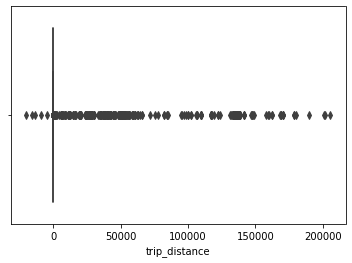

In [54]:
sns.boxplot(taxi_trips['trip_distance'])

<AxesSubplot:>

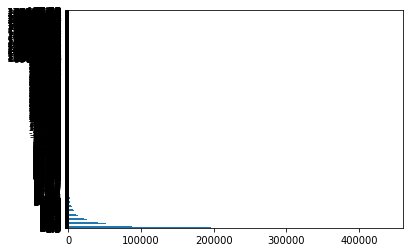

In [52]:
taxi_trips['trip_distance'].value_counts().plot(kind='barh')

<AxesSubplot:>

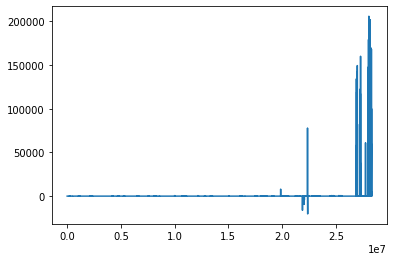

In [47]:
taxi_trips['trip_distance'].plot()

In [45]:
taxi_trips.loc[taxi_trips['passenger_count']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Vendor,Ratecode,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
506884,2,2017-01-04 00:03:57,2017-01-04 00:05:37,N,5,76,76,0,0.00,20.00,0.0,0.0,0.0,0.00,0.0,20.00,2,2,0.0,Verifone Inc.,Negotiated fare,Brooklyn,East New York,Boro Zone,Brooklyn,East New York,Boro Zone
506892,2,2017-01-08 02:20:49,2017-01-08 02:21:57,N,5,228,228,0,0.00,26.00,0.0,0.0,0.0,0.00,0.0,26.00,2,2,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Sunset Park West,Boro Zone,Brooklyn,Sunset Park West,Boro Zone
506900,2,2017-01-15 20:09:27,2017-01-15 20:09:49,N,5,225,17,0,0.00,6.00,0.0,0.0,0.0,0.00,0.0,6.00,2,2,0.0,Verifone Inc.,Negotiated fare,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Bedford,Boro Zone
506903,2,2017-01-17 11:53:56,2017-01-17 11:53:59,N,5,74,74,0,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.01,2,2,0.0,Verifone Inc.,Negotiated fare,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
506904,2,2017-01-17 11:58:02,2017-01-17 11:58:28,N,5,138,138,0,0.00,-33.54,0.0,0.0,0.0,0.00,0.0,-33.54,4,2,0.0,Verifone Inc.,Negotiated fare,Queens,LaGuardia Airport,Airports,Queens,LaGuardia Airport,Airports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28326066,0,2020-08-18 02:26:00,2020-08-18 02:52:00,NaN,0,117,76,0,10.64,46.61,0.0,0.0,0.0,2.29,0.3,49.20,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Brooklyn,East New York,Boro Zone
28326067,0,2020-08-18 03:02:00,2020-08-18 03:43:00,NaN,0,117,232,0,24.39,93.41,0.0,0.0,0.0,2.29,0.3,96.00,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone
28326068,0,2020-08-25 03:16:00,2020-08-25 03:54:00,NaN,0,117,232,0,24.65,93.41,0.0,0.0,0.0,2.29,0.3,96.00,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone
28326069,0,2020-08-30 02:48:00,2020-08-30 03:40:00,NaN,0,117,232,0,20.26,93.41,0.0,0.0,0.0,2.29,0.3,96.00,0,0,NaN,NaN,Unknown,Queens,Hammels/Arverne,Boro Zone,Manhattan,Two Bridges/Seward Park,Yellow Zone


In [44]:
data_dictionary

,Field,Description
0,VendorID,"A code indicating the LPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= Verifone Inc.)"
1,lpep_pickup_datetime,The date and time when the meter was engaged
2,lpep_dropoff_datetime,The date and time when the meter was disengaged
3,store_and_fwd_flag,"This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka �store and forward,� because the vehicle did not have a connection to the server (Y= store and forward trip; N= not a store and forward trip)"
4,RatecodeID,The final rate code in effect at the end of the trip (1= Standard rate; 2= JFK; 3= Newark; 4= Nassau or Westchester; 5= Negotiated fare; 6= Group ride)
5,PULocationID,TLC Taxi Zone in which the taximeter was engaged
6,DOLocationID,TLC Taxi Zone in which the taximeter was disengaged
7,passenger_count,The number of passengers in the vehicle (this is a driver entered value)
8,trip_distance,The elapsed trip distance in miles reported by the taximeter
9,fare_amount,The time-and-distance fare calculated by the meter
